# Gráficos e informações para poster da EXPOTEC

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
lic = pd.read_csv("licitacao.txt", sep="|", dtype={'cd_ugestora': str,'de_ugestora': str,'nu_licitacao': str,
                                                   'tp_licitacao': float,'de_tipolicitacao': str, 'dt_homologacao': str, 
                                                   'tp_objeto': str,'de_tipoobjeto': str, 'vl_licitacao': float,'de_obs': str}, engine='python', error_bad_lines=False, encoding = 'utf8')
jur = pd.read_csv("jurisdicionado.csv", dtype={'codigo_sagres': str})
prop = pd.read_csv("propostas_licitacao.txt", sep="|", dtype={'cod_unidade_gestora': str}, error_bad_lines=False)

Skipping line 144111: '|' expected after '"'
Skipping line 188932: '|' expected after '"'
Skipping line 198432: '|' expected after '"'
/home/mirian/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [21]:
lic_prop = pd.merge(prop, lic, left_on="cod_unidade_gestora", right_on="cd_ugestora", how="left").dropna()
lic_prop

MemoryError: 

In [18]:
lic_prop = pd.merge(prop, lic, left_on="unidade_gestora", right_on="de_ugestora", how="left").dropna()
lic_prop

MemoryError: 

In [ ]:
pd.merge(lic, prop, left_on=  ['cd_ugestora', 'de_ugestora'],
                   right_on= ['cod_unidade_gestora', 'unidade_gestora'], 
                   how = 'left')

In [29]:
pd.merge(prop, lic, left_on=['cod_unidade_gestora', 'unidade_gestora'], right_on=['cd_ugestora', 'de_ugestora'], how = 'left')

MemoryError: 

In [28]:
prop.merge(lic, left_on=['cod_unidade_gestora', 'unidade_gestora'], right_on=['cd_ugestora', 'de_ugestora'], how='left')

MemoryError: 

In [30]:
pd.merge(prop, lic, left_index=True, right_index=True, how='left')

,cod_unidade_gestora,unidade_gestora,numero_licitacao,cod_tipo_licitacao,tipo_licitacao,cpf_cnpj,nome_proponente,qtd_ofertada,valor_ofertado,situacao_proposta,cd_ugestora,de_ugestora,nu_Licitacao,tp_Licitacao,de_TipoLicitacao,dt_Homologacao,tp_Objeto,de_TipoObjeto,vl_Licitacao,de_Obs
0,101126,Câmara Municipal de Nazarezinho,000022009,8,Inexigível,20509197434,CLAUDIO CESAR GADELHA RODRIGUES,1.0,13200.00,Vencedora,101052,Câmara Municipal de Capim,000022013,8.0,Inexigível,07/02/2013,2.0,Compras e Serviços,24000.00,Prestacao de servicos juridicos em forma de as...
1,101126,Câmara Municipal de Nazarezinho,000022010,8,Inexigível,20509197434,CLAUDIO CESAR GADELHA RODRIGUES,1.0,14400.00,Vencedora,101053,Câmara Municipal de Caraúbas,000012016,8.0,Inexigível,08/01/2016,2.0,Compras e Serviços,30000.00,CONTRATACAO DOS SERVICOS ADVOCATICIOS
2,101126,Câmara Municipal de Nazarezinho,000022011,8,Inexigível,20509197434,CLAUDIO CESAR GADELHA RODRIGUES,1.0,18000.00,Vencedora,101053,Câmara Municipal de Caraúbas,000012016,11.0,Pregão Presencial,25/07/2016,2.0,Compras e Serviços,5727.00,AQUISICAO DE APARELHOS DE AR CONDICIONADO
3,101126,Câmara Municipal de Nazarezinho,000012010,8,Inexigível,88564355434,ERISVALDO GOMES DE MELO,1.0,15600.00,Perdedora,101053,Câmara Municipal de Caraúbas,000022016,8.0,Inexigível,08/01/2016,2.0,Compras e Serviços,32400.00,CONTRATACAO DOS SERVICOS DE CONTABILIDADE
4,101127,Câmara Municipal de Nova Floresta,000022014,8,Inexigível,5439371435,CLEIDSON FERNANDES SILVA,1.0,24000.00,Vencedora,101055,Câmara Municipal de Casserengue,000012012,2.0,Tomada de Preços,13/06/2012,2.0,Compras e Serviços,13650.00,AQUISIÇÃO DE COMBUSTIVEL.
5,101127,Câmara Municipal de Nova Floresta,000022015,8,Inexigível,5439371435,CLEIDSON FERNANDES SILVA,1.0,20000.00,Vencedora,101055,Câmara Municipal de Casserengue,000012012,3.0,Convite,03/04/2012,2.0,Compras e Serviços,22500.00,LOCAÇÃO DE VEÍCULO DESTINADO A DISPOSIÇÃO DA C...
6,101127,Câmara Municipal de Nova Floresta,000022016,8,Inexigível,5439371435,CLEIDSON FERNANDES SILVA,1.0,24000.00,Vencedora,101055,Câmara Municipal de Casserengue,000012015,8.0,Inexigível,13/03/2015,2.0,Compras e Serviços,26400.00,CONTRATACAO DE PROFISSIONAL COM NOTORIA ESPECI...
7,101127,Câmara Municipal de Nova Floresta,000022013,8,Inexigível,5439371435,CLEIDSON FERNANDES SILVA,1.0,18000.00,Vencedora,101055,Câmara Municipal de Casserengue,000012015,11.0,Pregão Presencial,01/04/2015,2.0,Compras e Serviços,9900.00,AQUISICAO PARCELADA DE COMBUSTIVEL (GASOLINA) ...
8,101129,Câmara Municipal de Nova Palmeira,000012008,3,Convite,11988276000146,PEDRO DE ALMEIDA SANTOS,1.0,23800.00,Perdedora,101055,Câmara Municipal de Casserengue,000022015,8.0,Inexigível,13/03/2015,2.0,Compras e Serviços,26400.00,CONTRATACAO DE SERVICOS ESPECIALIZADOS CONTABE...
9,101130,Câmara Municipal de Olho d'Água,000012012,3,Convite,13286651000131,ELUSIMAR RUFINO FERREIRA JUNIOR - ME,1.0,26400.00,Perdedora,101055,Câmara Municipal de Casserengue,000022015,11.0,Pregão Presencial,22/04/2015,2.0,Compras e Serviços,32400.00,"LOCACAO DE VEICULO COM MOTORISTA, PARA ATENDER..."


In [14]:
prop.join(lic, how='left')

,cod_unidade_gestora,unidade_gestora,numero_licitacao,cod_tipo_licitacao,tipo_licitacao,cpf_cnpj,nome_proponente,qtd_ofertada,valor_ofertado,situacao_proposta,cd_ugestora,de_ugestora,nu_Licitacao,tp_Licitacao,de_TipoLicitacao,dt_Homologacao,tp_Objeto,de_TipoObjeto,vl_Licitacao,de_Obs
0,101126,Câmara Municipal de Nazarezinho,000022009,8,Inexigível,20509197434,CLAUDIO CESAR GADELHA RODRIGUES,1.0,13200.00,Vencedora,101052,Câmara Municipal de Capim,000022013,8.0,Inexigível,07/02/2013,2.0,Compras e Serviços,24000.00,Prestacao de servicos juridicos em forma de as...
1,101126,Câmara Municipal de Nazarezinho,000022010,8,Inexigível,20509197434,CLAUDIO CESAR GADELHA RODRIGUES,1.0,14400.00,Vencedora,101053,Câmara Municipal de Caraúbas,000012016,8.0,Inexigível,08/01/2016,2.0,Compras e Serviços,30000.00,CONTRATACAO DOS SERVICOS ADVOCATICIOS
2,101126,Câmara Municipal de Nazarezinho,000022011,8,Inexigível,20509197434,CLAUDIO CESAR GADELHA RODRIGUES,1.0,18000.00,Vencedora,101053,Câmara Municipal de Caraúbas,000012016,11.0,Pregão Presencial,25/07/2016,2.0,Compras e Serviços,5727.00,AQUISICAO DE APARELHOS DE AR CONDICIONADO
3,101126,Câmara Municipal de Nazarezinho,000012010,8,Inexigível,88564355434,ERISVALDO GOMES DE MELO,1.0,15600.00,Perdedora,101053,Câmara Municipal de Caraúbas,000022016,8.0,Inexigível,08/01/2016,2.0,Compras e Serviços,32400.00,CONTRATACAO DOS SERVICOS DE CONTABILIDADE
4,101127,Câmara Municipal de Nova Floresta,000022014,8,Inexigível,5439371435,CLEIDSON FERNANDES SILVA,1.0,24000.00,Vencedora,101055,Câmara Municipal de Casserengue,000012012,2.0,Tomada de Preços,13/06/2012,2.0,Compras e Serviços,13650.00,AQUISIÇÃO DE COMBUSTIVEL.
5,101127,Câmara Municipal de Nova Floresta,000022015,8,Inexigível,5439371435,CLEIDSON FERNANDES SILVA,1.0,20000.00,Vencedora,101055,Câmara Municipal de Casserengue,000012012,3.0,Convite,03/04/2012,2.0,Compras e Serviços,22500.00,LOCAÇÃO DE VEÍCULO DESTINADO A DISPOSIÇÃO DA C...
6,101127,Câmara Municipal de Nova Floresta,000022016,8,Inexigível,5439371435,CLEIDSON FERNANDES SILVA,1.0,24000.00,Vencedora,101055,Câmara Municipal de Casserengue,000012015,8.0,Inexigível,13/03/2015,2.0,Compras e Serviços,26400.00,CONTRATACAO DE PROFISSIONAL COM NOTORIA ESPECI...
7,101127,Câmara Municipal de Nova Floresta,000022013,8,Inexigível,5439371435,CLEIDSON FERNANDES SILVA,1.0,18000.00,Vencedora,101055,Câmara Municipal de Casserengue,000012015,11.0,Pregão Presencial,01/04/2015,2.0,Compras e Serviços,9900.00,AQUISICAO PARCELADA DE COMBUSTIVEL (GASOLINA) ...
8,101129,Câmara Municipal de Nova Palmeira,000012008,3,Convite,11988276000146,PEDRO DE ALMEIDA SANTOS,1.0,23800.00,Perdedora,101055,Câmara Municipal de Casserengue,000022015,8.0,Inexigível,13/03/2015,2.0,Compras e Serviços,26400.00,CONTRATACAO DE SERVICOS ESPECIALIZADOS CONTABE...
9,101130,Câmara Municipal de Olho d'Água,000012012,3,Convite,13286651000131,ELUSIMAR RUFINO FERREIRA JUNIOR - ME,1.0,26400.00,Perdedora,101055,Câmara Municipal de Casserengue,000022015,11.0,Pregão Presencial,22/04/2015,2.0,Compras e Serviços,32400.00,"LOCACAO DE VEICULO COM MOTORISTA, PARA ATENDER..."


In [15]:
pd.concat([lic, prop], axis=1).reindex(prop.index)

,cd_ugestora,de_ugestora,nu_Licitacao,tp_Licitacao,de_TipoLicitacao,dt_Homologacao,tp_Objeto,de_TipoObjeto,vl_Licitacao,de_Obs,cod_unidade_gestora,unidade_gestora,numero_licitacao,cod_tipo_licitacao,tipo_licitacao,cpf_cnpj,nome_proponente,qtd_ofertada,valor_ofertado,situacao_proposta
0,101052,Câmara Municipal de Capim,000022013,8.0,Inexigível,07/02/2013,2.0,Compras e Serviços,24000.00,Prestacao de servicos juridicos em forma de as...,101126,Câmara Municipal de Nazarezinho,000022009,8,Inexigível,20509197434,CLAUDIO CESAR GADELHA RODRIGUES,1.0,13200.00,Vencedora
1,101053,Câmara Municipal de Caraúbas,000012016,8.0,Inexigível,08/01/2016,2.0,Compras e Serviços,30000.00,CONTRATACAO DOS SERVICOS ADVOCATICIOS,101126,Câmara Municipal de Nazarezinho,000022010,8,Inexigível,20509197434,CLAUDIO CESAR GADELHA RODRIGUES,1.0,14400.00,Vencedora
2,101053,Câmara Municipal de Caraúbas,000012016,11.0,Pregão Presencial,25/07/2016,2.0,Compras e Serviços,5727.00,AQUISICAO DE APARELHOS DE AR CONDICIONADO,101126,Câmara Municipal de Nazarezinho,000022011,8,Inexigível,20509197434,CLAUDIO CESAR GADELHA RODRIGUES,1.0,18000.00,Vencedora
3,101053,Câmara Municipal de Caraúbas,000022016,8.0,Inexigível,08/01/2016,2.0,Compras e Serviços,32400.00,CONTRATACAO DOS SERVICOS DE CONTABILIDADE,101126,Câmara Municipal de Nazarezinho,000012010,8,Inexigível,88564355434,ERISVALDO GOMES DE MELO,1.0,15600.00,Perdedora
4,101055,Câmara Municipal de Casserengue,000012012,2.0,Tomada de Preços,13/06/2012,2.0,Compras e Serviços,13650.00,AQUISIÇÃO DE COMBUSTIVEL.,101127,Câmara Municipal de Nova Floresta,000022014,8,Inexigível,5439371435,CLEIDSON FERNANDES SILVA,1.0,24000.00,Vencedora
5,101055,Câmara Municipal de Casserengue,000012012,3.0,Convite,03/04/2012,2.0,Compras e Serviços,22500.00,LOCAÇÃO DE VEÍCULO DESTINADO A DISPOSIÇÃO DA C...,101127,Câmara Municipal de Nova Floresta,000022015,8,Inexigível,5439371435,CLEIDSON FERNANDES SILVA,1.0,20000.00,Vencedora
6,101055,Câmara Municipal de Casserengue,000012015,8.0,Inexigível,13/03/2015,2.0,Compras e Serviços,26400.00,CONTRATACAO DE PROFISSIONAL COM NOTORIA ESPECI...,101127,Câmara Municipal de Nova Floresta,000022016,8,Inexigível,5439371435,CLEIDSON FERNANDES SILVA,1.0,24000.00,Vencedora
7,101055,Câmara Municipal de Casserengue,000012015,11.0,Pregão Presencial,01/04/2015,2.0,Compras e Serviços,9900.00,AQUISICAO PARCELADA DE COMBUSTIVEL (GASOLINA) ...,101127,Câmara Municipal de Nova Floresta,000022013,8,Inexigível,5439371435,CLEIDSON FERNANDES SILVA,1.0,18000.00,Vencedora
8,101055,Câmara Municipal de Casserengue,000022015,8.0,Inexigível,13/03/2015,2.0,Compras e Serviços,26400.00,CONTRATACAO DE SERVICOS ESPECIALIZADOS CONTABE...,101129,Câmara Municipal de Nova Palmeira,000012008,3,Convite,11988276000146,PEDRO DE ALMEIDA SANTOS,1.0,23800.00,Perdedora
9,101055,Câmara Municipal de Casserengue,000022015,11.0,Pregão Presencial,22/04/2015,2.0,Compras e Serviços,32400.00,"LOCACAO DE VEICULO COM MOTORISTA, PARA ATENDER...",101130,Câmara Municipal de Olho d'Água,000012012,3,Convite,13286651000131,ELUSIMAR RUFINO FERREIRA JUNIOR - ME,1.0,26400.00,Perdedora


In [12]:
pd.concat([prop,lic], axis=1)

,cod_unidade_gestora,unidade_gestora,numero_licitacao,cod_tipo_licitacao,tipo_licitacao,cpf_cnpj,nome_proponente,qtd_ofertada,valor_ofertado,situacao_proposta,cd_ugestora,de_ugestora,nu_Licitacao,tp_Licitacao,de_TipoLicitacao,dt_Homologacao,tp_Objeto,de_TipoObjeto,vl_Licitacao,de_Obs
0,101126,Câmara Municipal de Nazarezinho,000022009,8,Inexigível,20509197434,CLAUDIO CESAR GADELHA RODRIGUES,1.0,13200.00,Vencedora,101052,Câmara Municipal de Capim,000022013,8.0,Inexigível,07/02/2013,2.0,Compras e Serviços,24000.00,Prestacao de servicos juridicos em forma de as...
1,101126,Câmara Municipal de Nazarezinho,000022010,8,Inexigível,20509197434,CLAUDIO CESAR GADELHA RODRIGUES,1.0,14400.00,Vencedora,101053,Câmara Municipal de Caraúbas,000012016,8.0,Inexigível,08/01/2016,2.0,Compras e Serviços,30000.00,CONTRATACAO DOS SERVICOS ADVOCATICIOS
2,101126,Câmara Municipal de Nazarezinho,000022011,8,Inexigível,20509197434,CLAUDIO CESAR GADELHA RODRIGUES,1.0,18000.00,Vencedora,101053,Câmara Municipal de Caraúbas,000012016,11.0,Pregão Presencial,25/07/2016,2.0,Compras e Serviços,5727.00,AQUISICAO DE APARELHOS DE AR CONDICIONADO
3,101126,Câmara Municipal de Nazarezinho,000012010,8,Inexigível,88564355434,ERISVALDO GOMES DE MELO,1.0,15600.00,Perdedora,101053,Câmara Municipal de Caraúbas,000022016,8.0,Inexigível,08/01/2016,2.0,Compras e Serviços,32400.00,CONTRATACAO DOS SERVICOS DE CONTABILIDADE
4,101127,Câmara Municipal de Nova Floresta,000022014,8,Inexigível,5439371435,CLEIDSON FERNANDES SILVA,1.0,24000.00,Vencedora,101055,Câmara Municipal de Casserengue,000012012,2.0,Tomada de Preços,13/06/2012,2.0,Compras e Serviços,13650.00,AQUISIÇÃO DE COMBUSTIVEL.
5,101127,Câmara Municipal de Nova Floresta,000022015,8,Inexigível,5439371435,CLEIDSON FERNANDES SILVA,1.0,20000.00,Vencedora,101055,Câmara Municipal de Casserengue,000012012,3.0,Convite,03/04/2012,2.0,Compras e Serviços,22500.00,LOCAÇÃO DE VEÍCULO DESTINADO A DISPOSIÇÃO DA C...
6,101127,Câmara Municipal de Nova Floresta,000022016,8,Inexigível,5439371435,CLEIDSON FERNANDES SILVA,1.0,24000.00,Vencedora,101055,Câmara Municipal de Casserengue,000012015,8.0,Inexigível,13/03/2015,2.0,Compras e Serviços,26400.00,CONTRATACAO DE PROFISSIONAL COM NOTORIA ESPECI...
7,101127,Câmara Municipal de Nova Floresta,000022013,8,Inexigível,5439371435,CLEIDSON FERNANDES SILVA,1.0,18000.00,Vencedora,101055,Câmara Municipal de Casserengue,000012015,11.0,Pregão Presencial,01/04/2015,2.0,Compras e Serviços,9900.00,AQUISICAO PARCELADA DE COMBUSTIVEL (GASOLINA) ...
8,101129,Câmara Municipal de Nova Palmeira,000012008,3,Convite,11988276000146,PEDRO DE ALMEIDA SANTOS,1.0,23800.00,Perdedora,101055,Câmara Municipal de Casserengue,000022015,8.0,Inexigível,13/03/2015,2.0,Compras e Serviços,26400.00,CONTRATACAO DE SERVICOS ESPECIALIZADOS CONTABE...
9,101130,Câmara Municipal de Olho d'Água,000012012,3,Convite,13286651000131,ELUSIMAR RUFINO FERREIRA JUNIOR - ME,1.0,26400.00,Perdedora,101055,Câmara Municipal de Casserengue,000022015,11.0,Pregão Presencial,22/04/2015,2.0,Compras e Serviços,32400.00,"LOCACAO DE VEICULO COM MOTORISTA, PARA ATENDER..."


In [16]:
result = lic.merge(prop, on=['cd_ugestora','cod_unidade_gestora'])
result

KeyError: 'cd_ugestora'

In [23]:
prop.join(lic, on='cod_unidade_gestora') 

ValueError: You are trying to merge on object and int64 columns. If you wish to proceed you should use pd.concat

In [3]:
lic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199432 entries, 0 to 199431
Data columns (total 10 columns):
cd_ugestora         199432 non-null object
de_ugestora         198488 non-null object
nu_Licitacao        198488 non-null object
tp_Licitacao        198488 non-null float64
de_TipoLicitacao    198488 non-null object
dt_Homologacao      198488 non-null object
tp_Objeto           198488 non-null float64
de_TipoObjeto       198488 non-null object
vl_Licitacao        197179 non-null float64
de_Obs              193796 non-null object
dtypes: float64(3), object(7)
memory usage: 15.2+ MB


In [58]:
prop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441373 entries, 0 to 441372
Data columns (total 10 columns):
cod_unidade_gestora    441373 non-null object
unidade_gestora        441373 non-null object
numero_licitacao       441373 non-null object
cod_tipo_licitacao     441373 non-null int64
tipo_licitacao         441373 non-null object
cpf_cnpj               441373 non-null object
nome_proponente        441299 non-null object
qtd_ofertada           441373 non-null float64
valor_ofertado         430223 non-null float64
situacao_proposta      441373 non-null object
dtypes: float64(2), int64(1), object(7)
memory usage: 33.7+ MB


In [ ]:
lic_mun = pd.merge(lic, jur, left_on="de_ugestora", right_on="nome", how="left").dropna()
lic_mun

### Quais empresas perderam todas as licitações que participaram? Dessas, quais as que mais participaram de licitações?
Fazer um gráfico de barras onde apresente no eixo-x a quantidade de licitações que a empresa participou e no eixo-y o nome da empresa, ordenado da maior para a menor quantidade de licitações.

In [14]:
propostas = (prop['nome_proponente'].value_counts().rename_axis('nome_proponente').to_frame('situacao_proposta')
                   .join(pd.crosstab(prop['nome_proponente'], prop['situacao_proposta']))
                   .reset_index())
propostas

,nome_proponente,situacao_proposta,Perdedora,Pesquisado,Vencedora
0,CIRUFARMA COMERCIAL LTDA,985,56,1,928
1,RAIMUNDO ADELMAR FONSECA PIRES,488,167,0,321
2,PNEUMAX LTDA,461,231,0,230
3,JOSE NERGINO SOBREIRA,395,28,0,367
4,TECNOCENTER MATERIAIS MEDICOS HOSPITALARES LTDA,389,28,0,361
5,VENDE TUDO MAGAZINE LTDA,343,101,0,242
6,DROGAFONTE LTDA,338,10,0,328
7,COMERCIAL MEDEIROS LTDA,328,76,0,252
8,B J COMERCIO DE ALIMENTOS LTDA,328,32,0,296
9,CRM COMERCIAL LTDA,327,26,0,301


In [20]:
perdeu_tudo = propostas.loc[propostas['situacao_proposta'] == propostas['Perdedora']]
pt = perdeu_tudo[:10]
pt

,nome_proponente,situacao_proposta,Perdedora,Pesquisado,Vencedora
740,FLAVIO ROBERTO LUNA FILHO - ME,44,44,0,0
988,LIVRARIA E PAPELARIA LEIA,37,37,0,0
1119,ERLY ANTONIO DE SANTANA,34,34,0,0
1238,CONIL IND COMERCIO DE CONSTRUÇAO LTDA,32,32,0,0
1325,ONOFRE ALMEIDA BARBOSA,31,31,0,0
1339,PLUGNET COMERCIO E REPRESENTAÇÕES LTDA,31,31,0,0
1672,MILTONIZA CORREIA LIMA BORBA,26,26,0,0
1696,CONSTRUTORA ARQ. CONCRETO LTDA,26,26,0,0
1715,MARINALDO APRIGIO DOS SANTOS SILVA,26,26,0,0
1744,Assendino Suassuna Martins,26,26,0,0


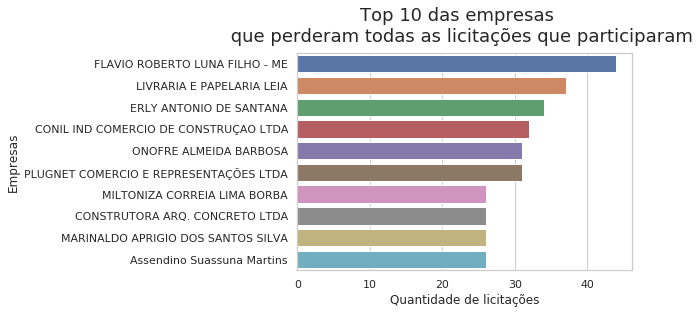

In [56]:
sns.set(style="whitegrid")
ax = sns.barplot(x="situacao_proposta", y="nome_proponente", data=pt, ci=None)
figure = ax.get_figure()    
ax.set(xlabel='Quantidade de licitações', ylabel='Empresas')
figure.suptitle('Top 10 das empresas \n que perderam todas as licitações que participaram', y=1.04, fontsize=18)
figure.savefig('perdeutudo.png', dpi=400, bbox_inches="tight")

### Quais as top-10 empresas que mais receberam dinheiro em licitações de municípios no último mandato (de 2017 até agora)?
Fazer um gráfico de barras onde apresente no eixo-x o valor total recebido pela empresa e no eixo-y o nome da empresa, ordenado do maior para o menor valor.